In [1]:
cd ..

/Users/casperneo/work/cloud-research/clouds


In [85]:
import tensorflow as tf
from os import path
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
model_dir = "output/hdf/m18vae/"

In [22]:
with open(path.join(model_dir, "ae.json"), "r") as f:
    ae = tf.keras.models.model_from_json(f.read())

NameError: name 'tf' is not defined

In [66]:
from reproduction.models import autoencoder
ae = autoencoder((64, 64, 3), variational=True)
ae.load_weights(path.join(model_dir, "ae.h5"))

In [67]:
ae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ae_input (InputLayer)           (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 64, 64, 32)   896         ae_input[0][0]                   
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 32, 32, 32)   9248        conv2d_45[0][0]                  
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 32, 32, 64)   18496       conv2d_46[0][0]                  
__________________________________________________________________________________________________
conv2d_48 

In [68]:
list(enumerate(l.name for l in ae.layers))

[(0, 'ae_input'),
 (1, 'conv2d_45'),
 (2, 'conv2d_46'),
 (3, 'conv2d_47'),
 (4, 'conv2d_48'),
 (5, 'conv2d_49'),
 (6, 'conv2d_50'),
 (7, 'latent_mean'),
 (8, 'latent_log_var'),
 (9, 'sampling'),
 (10, 'conv2d_51'),
 (11, 'conv2d_transpose_15'),
 (12, 'conv2d_52'),
 (13, 'conv2d_transpose_16'),
 (14, 'conv2d_53'),
 (15, 'conv2d_transpose_17'),
 (16, 'reconstructed')]

In [70]:
decoder = tf.keras.models.Sequential()
for l in ae.layers[10:]:
    decoder.add(l)

In [61]:
p = tf.placeholder(tf.float32, (None, 8, 8, 128))

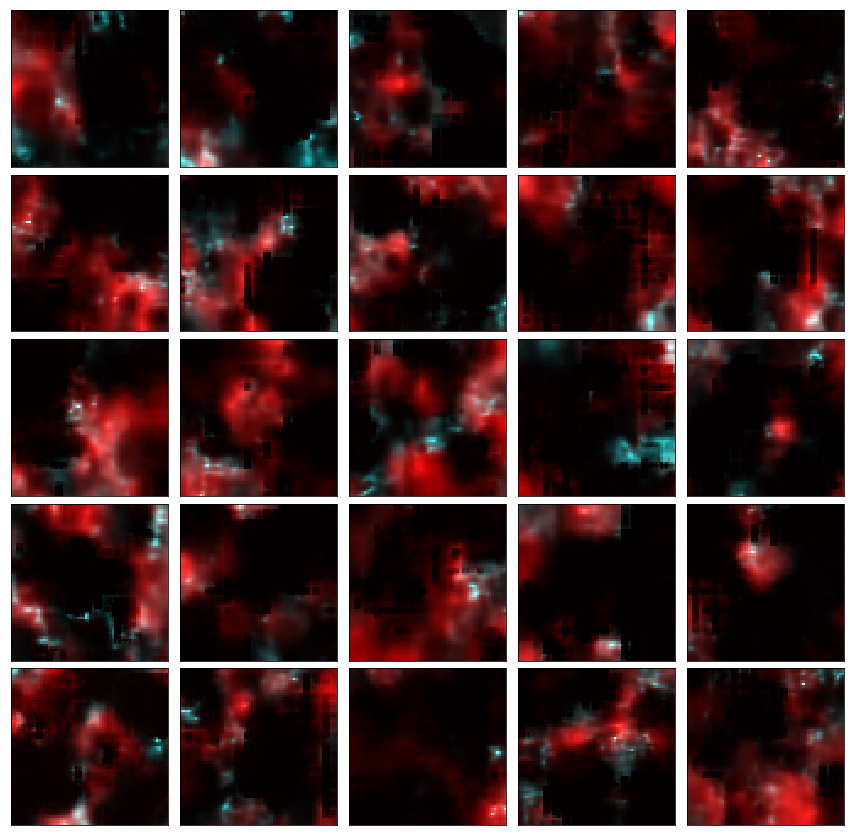

In [208]:
width = 3
rows = 5
cols = 5

fig, ax = plt.subplots(rows, cols, figsize=(cols * width, rows * width))

for r in range(rows):
    for c in range(cols):

        z = np.random.normal(size=(1, 8, 8, 128))
        y = decoder.predict(z)[0]

        tmp = y[:,:,2]
        y[:,:,2] = y[:,:,1]
        y[:,:,1] = tmp

        a = ax[r,c]
        a.imshow(y / y.max(axis=(0,1)))
#         a.imshow(y / y.std(axis=(0,1)))
        a.set_xticks([])
        a.set_yticks([])
        
fig.subplots_adjust(wspace=0.05, hspace=0.05)